In [3]:
from dataclasses import dataclass
from math import gcd, ceil
import re
import numpy as np
from collections import Counter, defaultdict, namedtuple, deque, OrderedDict
from functools import cache
from itertools import product, chain, combinations, combinations_with_replacement, permutations, accumulate, zip_longest, batched, pairwise
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

from aocutils.common import copy_func, patch_to, patch, to_int, ints, flatten, zippify, multidict, rev, sortdict, data, quantify, atom, atoms, list_atoms, list_multiply, mapt, Node
from aocutils.grid import TURNRIGHT, TURNLEFT, move, gridneigh, arr_to_dict, grid_to_dict, neighbors, complexneighbors, arr_neighbors, iterate, Dim, dimensions, positive, ranges2grid, manhattan, conv1d, conv2d, rotate, rot90
from aocutils.maze import graphparse, bfs, dijkstra, distances, get_path, dfs
from aocutils.math import gcd, factors, lcm, crt, mul_inv, Segment, lis, angle, all_combinations, all_permutations, mst, shoelace
from aocutils.special import md5, binarysearch, deduce_matches, find_specific_pattern, find_repeat, find_cycle, UnionFind, Octree, LazySegmentTree, Trie
from aocutils.visuals import visualize_graph, labelize, animate_grid, plot, animate
from aocutils.cfg import CFG
from aocutils.earley import State, Earley
from aocutils.shunting import ShuntingYard
E = (0,1); W = (0,-1); N = (-1,0); S = (1,0)
winds = [N, E, S, W]
inf = float('inf')

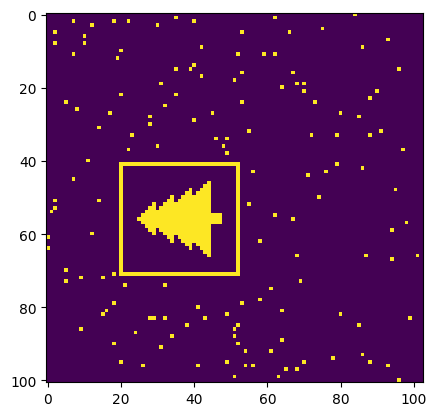

interactive(children=(IntSlider(value=0, description='frame', max=143), Output()), _dom_classes=('widget-inter…

In [ ]:

f = open("in.txt").read().split("\n")
maxx = 101
maxy = 103

# f = open("t0.txt").read().split("\n")
# # f = open("t1.txt").read().split("\n")
# maxx = 11
# maxy = 7


lines = [ints(line) for line in f]

robots = []
for line in lines:
    x,y, dx, dy = line
    robots.append(((x,y), (dx,dy)))

sets = []
for sec in range(7344):
    newrobots = []
    counts = defaultdict(int)
    for robot in robots:
        loc, direc = robot
        newloc = move(loc, direc)
        newloc = ((newloc[0] % maxx), (newloc[1] % maxy))
        counts['x',newloc[0]] +=1
        counts['y',newloc[1]]+=1
        newrobots.append((newloc, direc))
    robots = newrobots
    if max(counts.values()) > 33:
        
        sets.append((sec, {r[0] for r in robots}))
grid = [[0 * y for y in range(maxy)] for x in range(maxx)]

for r in robots:
    loc, direc = r
    grid[loc[0]][loc[1]] = 1

plot(grid)
        
animate([b for a,b in sets])     
    


In [82]:
counts

defaultdict(int,
            {('x', 91): 1,
             ('y', 31): 11,
             ('x', 51): 15,
             ('y', 39): 20,
             ('x', 48): 7,
             ('y', 44): 23,
             ('x', 22): 2,
             ('y', 20): 34,
             ('x', 86): 2,
             ('y', 51): 6,
             ('x', 55): 25,
             ('y', 40): 18,
             ('x', 45): 3,
             ('y', 7): 3,
             ('x', 60): 17,
             ('y', 52): 34,
             ('x', 50): 12,
             ('x', 85): 3,
             ('y', 38): 18,
             ('x', 62): 12,
             ('y', 36): 13,
             ('x', 97): 2,
             ('y', 65): 1,
             ('x', 20): 1,
             ('y', 64): 3,
             ('x', 56): 26,
             ('x', 2): 4,
             ('y', 22): 4,
             ('x', 59): 19,
             ('x', 90): 2,
             ('x', 96): 5,
             ('y', 26): 6,
             ('x', 52): 17,
             ('y', 35): 14,
             ('x', 54): 21,
             ('x', 38)

In [75]:
counts = defaultdict(int)
for r in robots:
    loc, direc = r
    counts['x',loc[0]] +=1
    counts['y',loc[1]]+=1
counts

defaultdict(int,
            {('x', 91): 1,
             ('y', 64): 4,
             ('x', 51): 15,
             ('y', 82): 6,
             ('x', 48): 7,
             ('y', 71): 3,
             ('x', 22): 2,
             ('y', 34): 5,
             ('x', 86): 2,
             ('y', 84): 6,
             ('x', 55): 25,
             ('y', 6): 6,
             ('x', 45): 3,
             ('y', 22): 8,
             ('x', 60): 17,
             ('x', 50): 12,
             ('y', 14): 4,
             ('x', 85): 3,
             ('x', 62): 12,
             ('y', 102): 5,
             ('y', 59): 8,
             ('x', 97): 2,
             ('y', 25): 3,
             ('x', 20): 1,
             ('y', 7): 4,
             ('x', 56): 26,
             ('y', 16): 6,
             ('x', 2): 4,
             ('y', 92): 6,
             ('x', 59): 19,
             ('x', 90): 2,
             ('y', 81): 5,
             ('x', 96): 5,
             ('y', 18): 6,
             ('x', 52): 17,
             ('y', 38): 6,
     

211773366

interactive(children=(IntSlider(value=0, description='frame', max=39), Output()), _dom_classes=('widget-intera…

In [ ]:
q = defaultdict(int)
for robot in robots:
    loc, direc = robot
    if loc[0] != maxx//2 and loc[1] != maxy //2:
        smallx = loc[0] < (maxx//2)
        smally = loc[1] < (maxy//2)
        q[(smallx, smally)] += 1
    
import operator
from functools import reduce
reduce(operator.mul,q.values())   

10403

In [ ]:
# grid
grid, neigh = gridneigh("in.txt", to_dict=True, parser=lambda x: [(ch) for ch in x])
(minr, minc), (maxr, maxc), (rows, cols) = dimensions(grid)


In [ ]:
# graph
conn = graphparse("in.txt", parser=lambda line: [x for x in line.split()])
conn = graphparse(
    "in.txt",
    parser=lambda line: [int(x) if x.isnumeric() else x for x in line.split()],
    weights=True,
)

In [7]:
E = 1; W = -1; N = 1j; S = -1j
TURNLEFT = lambda x: x * 1j
TURNRIGHT = lambda x: x * -1j

# parse grid with complex numbers
f = open("in.txt").read().split("\n")
lines = [list(line.split()) for line in f]
grid = arr_to_dict(lines, tocomplex=True)
complexneighbors(3+2j)

{(2+2j), (3+1j), (3+3j), (4+2j)}